name: Mikayla Norton

group members:
* Bingqing Wang
* Sahithi Sane
* Pranit Ahuja

Feel free to arrange the tables so that your group can work effectively together. Please return them to their original configuration before you leave.

Read this notebook completely before you get started. There are essentially two parts: Seaborn visualization and getting those visualizations into Streamlit. Be strategic:
* spend 35 minutes on each part,
* have half your group get started on each part and then bring them together.

____
## Seaborn ICA
____

The main goal for this ICA is to get data, perform some simple EDA and design the layout for a web app. This is the process you will be thinking about for your first project. Think of this as practice for your project, as well as practicing with Seaborn.

To make it so that you can discuss with your classmates, however, we will all use the same dataset for today.

Suppose you decide to do a project in the medical arena, and you learn of the Wisconsin Breast Cancer Diagnostic dataset.

👉🏻 (5) Your first task: find the WI cancer dataset and download it. There are many places on the internet where you can find it, and it might be in slightly different formats depending on where you get it.

👉🏻 (5) Read the dataset into a dataframe, using something like [.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Note that you may need to use more than one file to get the column names. This is the messy part of data science. You might spend some time finding a clean CSV that already has the column names (hint: kaggle), or you need to add the information yourself.

👉🏻 (8) One you have read the data in and built a dataframe with good column names, perform some basic IDA and EDA. Are there NaNs? What are in the columns and what looks useful? You might use some of the basic plotting capabilities in Pandas, or even try using `Seaborn`.

👉🏻 (15) Design 3-5 "interesting" `Seaborn` plots. Talk through this with your group. Here, "interesting" means that there is an interesting **story/narrative** to be told. Think through what good choices would be: are there interesting distributions? are there interesting categories, and distributions within categories? Feel free to make as many practice plots as you need, which you use in Streamlit. Design these plots into a web app. In a markdown cell, describe your design.

Use one Seaborn plot from each type ([distribution](https://seaborn.pydata.org/tutorial/distributions.html), [categorical](https://seaborn.pydata.org/tutorial/categorical.html) and [relational](https://seaborn.pydata.org/tutorial/relational.html)). If it makes sense, use the regression options.


In [2]:
import pandas as pd
import seaborn as sns

cancer = pd.read_csv("data.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer.isna().sum()
cancer.drop(["Unnamed: 32"], axis=1, inplace=True)

The id is a unique identifier, diagnosis is a classifier, and the remaining values are dimensions/features of the fine needle aspirate process per patient/id.

In [ ]:
sns_plot = sns.pairplot(cancer, hue="diagnosis")
sns_plot.savefig("pairplot.png")

/Users/mnorton/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: >

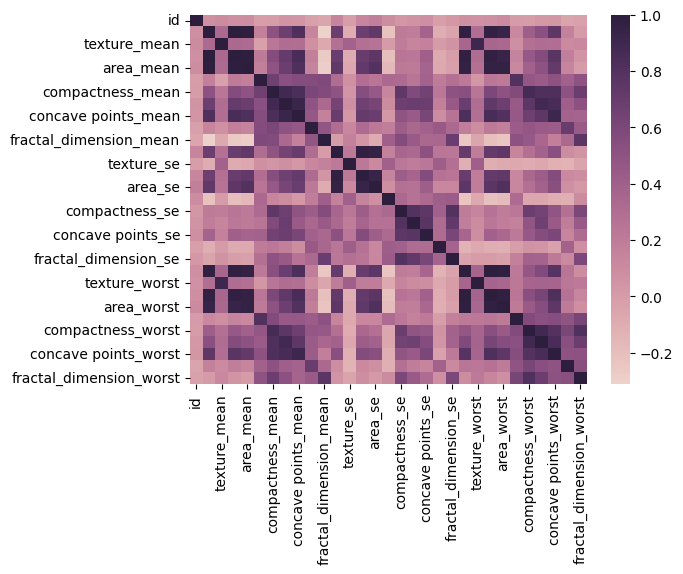

In [12]:
cancer_corr = cancer.select_dtypes('number').corr()
cubehelix_palette = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(cancer_corr, cmap=cubehelix_palette) 

____
### Build the WebApp
____

👉🏻 Build a web app using `streamlit`. This web app will be different from your previous web apps in three ways:
1. you use the WI Cancer dataset, which needs to be read in from a file (not coming in through a library),
2. your plots are all Seaborn (not Altair or Plotly or Matplotlib),
3. you will ask your user to [input something](https://docs.streamlit.io/library/api-reference/widgets) that impacts at least one of the plots.


A simple idea for step 3 is to ask the user to input what column to plot, using [this widget](https://docs.streamlit.io/library/api-reference/widgets/st.selectbox). Or, you can use two widgets to ask for what to put on $y$ and $x$. It's up to you: when you do your project, you will have to make these decisions on your own, as each student will have a unique design.

Before you leave, demonstrate your web app, using `streamlit run your_file.py` to one of the instructors. Include  `your_file.py` file in D2L, as well as this notebook.


🔆 <font color="pink">I focused on the web app development for the team. see the ica3.py file for details. I created the interactive pairplot with the column selection</font>
